In [1]:
import pandas as pd

In [2]:
true = pd.read_csv(r'C:\Users\user\Downloads\COVID19-FNIR\trueNews.csv')

In [3]:
true.head(3)

,ID,text,label,origin
0,1,EU must go 'back to the future' of open border...,REAL,https://twitter.com/the_hindu/status/122725962...
1,3,The boy is the resident of Gurugram's Palam Vi...,REAL,https://twitter.com/ndtv/status/12274908434742...
2,4,The proposal came after the Centre on Saturday...,REAL,https://twitter.com/the_hindu/status/122744471...


In [4]:
true.shape

(3793, 4)

In [5]:
fake = pd.read_csv(r'C:\Users\user\Downloads\COVID19-FNIR\fakeNews.csv')
fake.shape

(3795, 4)

In [6]:
fake.head(3)

,ID,text,label,origin
0,2,"""The new Dane County lockdown policy... (has)...",FAKE,https://www.poynter.org/?ifcn_misinformation=t...
1,7,Indian politician Uddhav Thackeray has asked ...,FAKE,https://www.poynter.org/?ifcn_misinformation=t...
2,10,A widely shared video in which the doctor ?n...,FAKE,https://www.poynter.org/?ifcn_misinformation=t...


In [7]:
true['label'] = 1
fake['label'] = 0

In [8]:
# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [9]:
df = pd.concat(frames)

In [10]:
df.shape

(7588, 4)

In [11]:
df.tail()

,ID,text,label,origin
3790,6311,People are panicked about a COVID-19 case at ...,0,https://www.poynter.org/?ifcn_misinformation=b...
3791,6312,Indian ministry of Tourism orders closure of ...,0,https://www.poynter.org/?ifcn_misinformation=c...
3792,6313,"5,000 kilos of masks have not been delivered ...",0,https://www.poynter.org/?ifcn_misinformation=a...
3793,6314,Every U.S. election year has a disease outbre...,0,https://www.poynter.org/?ifcn_misinformation=a...
3794,6315,Irish news organisations are organising a col...,0,https://www.poynter.org/?ifcn_misinformation=t...


In [12]:
X = df. drop('label', axis=1)
y = df['label']

In [13]:
df = df.dropna()
df2 = df.copy()

In [14]:
df2.head()

,ID,text,label,origin
0,1,EU must go 'back to the future' of open border...,1,https://twitter.com/the_hindu/status/122725962...
1,3,The boy is the resident of Gurugram's Palam Vi...,1,https://twitter.com/ndtv/status/12274908434742...
2,4,The proposal came after the Centre on Saturday...,1,https://twitter.com/the_hindu/status/122744471...
3,5,"UK's COVID-19 death toll tops 40,000, worst in...",1,https://twitter.com/IndiaToday/status/12282764...
4,6,#JammuAndKashmir | According to an administrat...,1,https://twitter.com/the_hindu/status/122854247...


In [15]:
df2.reset_index(inplace=True)
df2.head()

,index,ID,text,label,origin
0,0,1,EU must go 'back to the future' of open border...,1,https://twitter.com/the_hindu/status/122725962...
1,1,3,The boy is the resident of Gurugram's Palam Vi...,1,https://twitter.com/ndtv/status/12274908434742...
2,2,4,The proposal came after the Centre on Saturday...,1,https://twitter.com/the_hindu/status/122744471...
3,3,5,"UK's COVID-19 death toll tops 40,000, worst in...",1,https://twitter.com/IndiaToday/status/12282764...
4,4,6,#JammuAndKashmir | According to an administrat...,1,https://twitter.com/the_hindu/status/122854247...


In [39]:
df2.tail()

,index,ID,text,label,origin
7583,3790,6311,People are panicked about a COVID-19 case at ...,0,https://www.poynter.org/?ifcn_misinformation=b...
7584,3791,6312,Indian ministry of Tourism orders closure of ...,0,https://www.poynter.org/?ifcn_misinformation=c...
7585,3792,6313,"5,000 kilos of masks have not been delivered ...",0,https://www.poynter.org/?ifcn_misinformation=a...
7586,3793,6314,Every U.S. election year has a disease outbre...,0,https://www.poynter.org/?ifcn_misinformation=a...
7587,3794,6315,Irish news organisations are organising a col...,0,https://www.poynter.org/?ifcn_misinformation=t...


In [16]:
df2['origin'][2]

'https://twitter.com/the_hindu/status/1227444718243602432'

**Data Preprocessing**

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [20]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [21]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model building - Passive Aggresive Classifier**

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
passiveAgg = PassiveAggressiveClassifier(max_iter=8000)

In [23]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import roc_auc_score

passiveAgg.fit(X_train, y_train)

pred = passiveAgg.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :   %0.4f" % roc)


accuracy:   0.9928
ROC-AUC :   0.9927


In [24]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()

decisionTree.fit(X_train, y_train)

pred = decisionTree.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :   %0.4f" % roc)


accuracy:   0.9888
ROC-AUC :   0.9888


In [25]:
from sklearn.naive_bayes import MultinomialNB
multinominalNB = MultinomialNB()

multinominalNB.fit(X_train, y_train)

pred = multinominalNB.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :   %0.4f" % roc)

accuracy:   0.9835
ROC-AUC :   0.9837


In [26]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100)

randomForest.fit(X_train, y_train)

pred = randomForest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % accuracy)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC:   %0.4f" % roc)

accuracy:   0.9895
ROC-AUC:   0.9892


In [27]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -.5])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


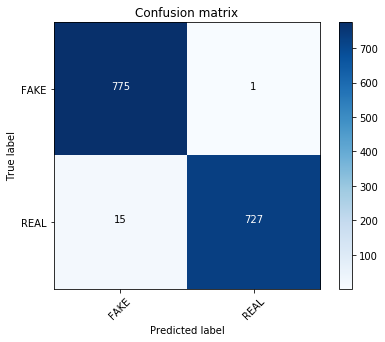

In [28]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Validate on an unseen datapoint**

In [29]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][520])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'coronaviru diseas caus bacterium turn caus thrombosi moreov bacteria get stronger influenc g wave'

In [30]:
val = tfidf_v.transform([review]).toarray()

In [31]:
passiveAgg.predict(val)

array([0], dtype=int64)

**Save model and vectorizer**

In [32]:
import pickle

In [33]:
pickle.dump(passiveAgg, open('model2.pkl', 'wb'))

In [34]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

**Load model and vectorizer to predict the previous datapoint**

In [35]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))

In [36]:
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [37]:
val_pkl = joblib_vect.transform([review]).toarray()

In [38]:
joblib_model.predict(val_pkl)

array([0], dtype=int64)